# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

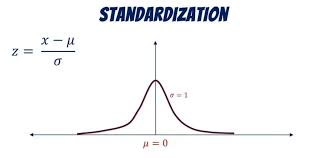


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kenya_primary_schools.csv to kenya_primary_schools.csv


In [ ]:
import numpy as np
import pandas as pd

def standardize_data(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Handle missing values (imputing with mean)
    numeric_columns = df.select_dtypes(include = [np.number]).columns.tolist()
    for col in numeric_columns:
      df[col] = df[col].fillna(df[col].mean())

    #Turn non-numeric columns to numeric
    non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()
    for col in non_numeric_columns:
      df[col] = pd.factorize(df[col])[0]

    # Get numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Extract numeric data as numpy array
    data = df[numeric_columns].values

    # Calculate mean and std along each column
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Prevent division by zero/ Prevent zero standard deviation
    std[std == 0] = 1

    # Check for zero standard deviation
    # if np.any(std == 0):
    #     raise ValueError("One or more columns have zero standard deviation")

    # Standardize the data
    standardized_data = (data - mean) / std

    return standardized_data, df, numeric_columns


# Usage (must be at the far left — no indentation)
standardized_data, df, numeric_columns = standardize_data('kenya_primary_schools.csv')
print("Standardized data shape:", standardized_data.shape)
print(standardized_data[:5])



Standardized data shape: (31230, 38)
[[-0.24872262  0.73176339 -0.62277293 -1.67178455  0.00565876 -0.55893244
  -0.60330649 -0.13342027 -0.24759981 -0.26184355 -0.62263942 -1.1362063
  -0.33538022 -0.18540914 -0.88433289 -0.85605764 -0.6078433  -0.10320655
  -0.12811858 -0.12503057 -0.99519231 -0.50863067 -0.51635822 -0.04952005
  -0.06107885 -0.41927274 -0.37277836 -0.31276337 -0.33067258 -0.78375755
  -0.35921678 -1.00363495 -1.4016048  -1.59210801 -1.30045362 -1.80346464
   0.7317666  -0.2486982 ]
 [-0.22936167  0.72343235 -0.62266201 -1.67165724  0.00565876 -0.55893244
  -0.60330649 -0.13342027 -0.24759981 -0.26184355 -0.26827317 -0.5592566
   0.06019142 -0.18540914 -0.63618539 -0.64733662  0.06210582 -0.10320655
  -0.12811858 -0.12503057 -0.61700138  0.80583698 -0.76334619 -0.04952005
  -0.06107885 -0.41927274 -0.37277836 -0.31276337 -0.33067258 -0.22671336
   0.05938021 -1.00363495 -1.4016048  -1.59210801 -1.30045362 -1.80346464
   0.72343557 -0.22933702]
 [-0.22290802  0.706770

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [ ]:
# Step 3: Calculate the Covariance Matrix
cov_matrix = np.dot(standardized_data.T, standardized_data) / (standardized_data.shape[0] - 1) # Calculate covariance matrix
cov_matrix

array([[ 1.00003202, -0.44788649,  0.06292896, ..., -0.30628798,
        -0.44788917,  1.00002048],
       [-0.44788649,  1.00003202,  0.11835696, ...,  0.40415024,
         1.00003187, -0.44789393],
       [ 0.06292896,  0.11835696,  1.00003202, ...,  0.34435236,
         0.1183516 ,  0.06288293],
       ...,
       [-0.30628798,  0.40415024,  0.34435236, ...,  1.00003202,
         0.40415589, -0.30624233],
       [-0.44788917,  1.00003187,  0.1183516 , ...,  0.40415589,
         1.00003202, -0.44789398],
       [ 1.00002048, -0.44789393,  0.06288293, ..., -0.30624233,
        -0.44789398,  1.00003202]])

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [ ]:
# Step 4: Perform Eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)  # Perform eigendecomposition
eigenvalues, eigenvectors

(array([4.53776115e-16, 6.19839576e-10, 3.57381240e-02, 8.61681180e-02,
        1.17835266e-01, 1.37977121e-01, 1.63175734e-01, 2.00244349e-01,
        2.20345243e-01, 2.52877604e-01, 2.71311193e-01, 2.96419226e-01,
        3.07532049e-01, 3.68293441e-01, 4.20143881e-01, 4.46313063e-01,
        4.56313651e-01, 5.05419561e-01, 5.72259588e-01, 5.79290646e-01,
        6.16002044e-01, 6.75933182e-01, 7.52439994e-01, 7.92489048e-01,
        8.10834538e-01, 9.29963493e-01, 9.99073313e-01, 1.03633922e+00,
        1.27473219e+00, 1.37522365e+00, 1.45312314e+00, 1.59843002e+00,
        1.89697490e+00, 2.13908963e+00, 2.82066886e+00, 3.23147323e+00,
        4.73887959e+00, 5.42188893e+00]),
 array([[-6.47835582e-02, -7.04132898e-01, -1.93239633e-04, ...,
         -1.43167445e-01,  1.72589391e-01, -2.51064777e-03],
        [-7.04132797e-01,  6.47843516e-02, -3.24830363e-04, ...,
          1.10059076e-01, -2.48033321e-01, -8.11938720e-03],
        [ 2.95875903e-13, -3.34327018e-07,  8.07277156e-04

### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [ ]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues) [::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly

#Print the explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
print("Variance ratio:", explained_variance_ratio)

sorted_eigenvectors

Variance ratio: [1.42676719e-01 1.24703365e-01 8.50360461e-02 7.42257510e-02
 5.62900300e-02 4.99187935e-02 4.20626009e-02 3.82388581e-02
 3.61889373e-02 3.35445098e-02 2.72712114e-02 2.62905611e-02
 2.44719399e-02 2.13370677e-02 2.08543072e-02 1.98004184e-02
 1.77871457e-02 1.62100610e-02 1.52440025e-02 1.50589806e-02
 1.33000889e-02 1.20078695e-02 1.17447045e-02 1.10560639e-02
 9.69162233e-03 8.09268952e-03 7.80025616e-03 7.13953963e-03
 6.65446070e-03 5.79837334e-03 5.26941938e-03 4.29396077e-03
 3.63086059e-03 3.10082877e-03 2.26750944e-03 9.40446833e-04
 1.63110455e-11 1.19410943e-17]


array([[-2.51064777e-03,  1.72589391e-01, -1.43167445e-01, ...,
        -1.93239633e-04, -7.04132898e-01, -6.47835582e-02],
       [-8.11938720e-03, -2.48033321e-01,  1.10059076e-01, ...,
        -3.24830363e-04,  6.47843516e-02, -7.04132797e-01],
       [-5.40206396e-02, -2.74244931e-01, -6.14833522e-02, ...,
         8.07277156e-04, -3.34327018e-07,  2.95875903e-13],
       ...,
       [-6.79928292e-02, -3.82422814e-01, -4.85707538e-02, ...,
        -6.31585917e-03, -4.47653040e-08,  3.83859611e-14],
       [-8.12048578e-03, -2.48035687e-01,  1.10056710e-01, ...,
        -3.24900208e-04, -6.47845783e-02,  7.04132658e-01],
       [-2.52048445e-03,  1.72570842e-01, -1.43190355e-01, ...,
        -1.93245513e-04,  7.04124707e-01,  6.47827852e-02]])

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [ ]:
# Step 6: Project Data onto Principal Components
#Determine the number of components to keep based on explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1 # Keep 95% of variance
print(f"Number of components needed to explain 95% of variance: {num_components}")

#Project data onto the principal components
reduced_data = np.dot(standardized_data, sorted_eigenvectors[:, :num_components])  # Project data onto the principal components
reduced_data[:5] # Display first 5 rows of transform

Number of components needed to explain 95% of variance: 26


array([[-1.16125890e+00,  3.08562354e+00,  1.89400511e+00,
        -1.31931380e+00,  5.00510027e-01,  1.48927102e+00,
         4.47909220e-01, -2.87139130e-01, -7.37669959e-01,
         7.75820331e-01,  9.91564634e-02,  3.67737947e-02,
         4.30417261e-01, -1.13774936e-01, -2.60974516e-01,
         1.71998040e-01, -3.76459596e-01, -3.02974853e-01,
        -1.46434664e-01,  1.47823707e-01,  3.97254378e-02,
         2.77450994e-02,  2.13452571e-01, -7.61439566e-01,
        -6.88587134e-01,  3.76139294e-02],
       [-5.72635033e-02,  2.90652755e+00,  1.80867468e+00,
        -1.38972375e+00,  7.67296871e-02,  1.01746103e+00,
         1.94452821e-01, -3.10091257e-01, -1.03984845e+00,
         7.72571183e-01, -1.61263641e-01,  1.71844905e-02,
         2.83979697e-01, -4.58938357e-01, -7.87048325e-02,
        -3.06314687e-01, -5.05866262e-01, -5.04321317e-01,
        -6.86779365e-01,  5.54174083e-01,  5.35717158e-01,
         9.93029460e-02,  1.98307107e-01, -3.79778680e-01,
        -5.09

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [ ]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')  # Display reduced data shape
reduced_data[:5]  # Display the first few rows of reduced data

Reduced Data Shape: (31230, 26)


array([[-1.16125890e+00,  3.08562354e+00,  1.89400511e+00,
        -1.31931380e+00,  5.00510027e-01,  1.48927102e+00,
         4.47909220e-01, -2.87139130e-01, -7.37669959e-01,
         7.75820331e-01,  9.91564634e-02,  3.67737947e-02,
         4.30417261e-01, -1.13774936e-01, -2.60974516e-01,
         1.71998040e-01, -3.76459596e-01, -3.02974853e-01,
        -1.46434664e-01,  1.47823707e-01,  3.97254378e-02,
         2.77450994e-02,  2.13452571e-01, -7.61439566e-01,
        -6.88587134e-01,  3.76139294e-02],
       [-5.72635033e-02,  2.90652755e+00,  1.80867468e+00,
        -1.38972375e+00,  7.67296871e-02,  1.01746103e+00,
         1.94452821e-01, -3.10091257e-01, -1.03984845e+00,
         7.72571183e-01, -1.61263641e-01,  1.71844905e-02,
         2.83979697e-01, -4.58938357e-01, -7.87048325e-02,
        -3.06314687e-01, -5.05866262e-01, -5.04321317e-01,
        -6.86779365e-01,  5.54174083e-01,  5.35717158e-01,
         9.93029460e-02,  1.98307107e-01, -3.79778680e-01,
        -5.09

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

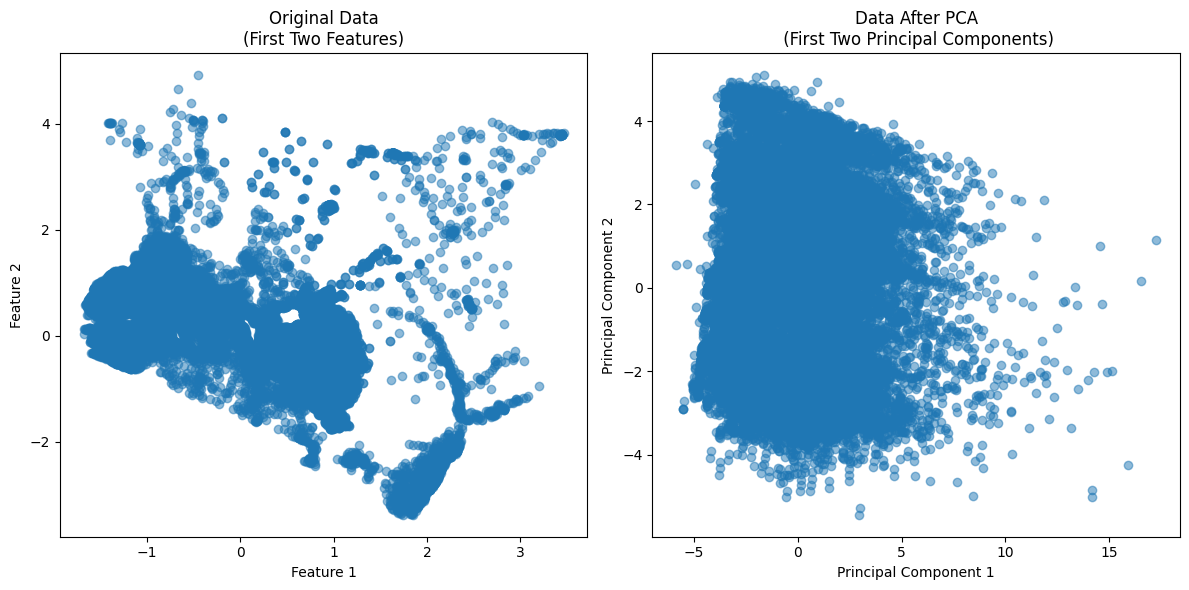

In [ ]:
# Step 8: Visualize Before and After PCA
import matplotlib.pyplot as plt

#Create a figure with two subplots side by side
plt.figure(figsize=(12, 6))

# Plot original data (first two features for simplicity)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.5)
plt.title('Original Data\n(First Two Features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot reduced data after PCA
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.title('Data After PCA\n (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()